In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Linear SVM Classification

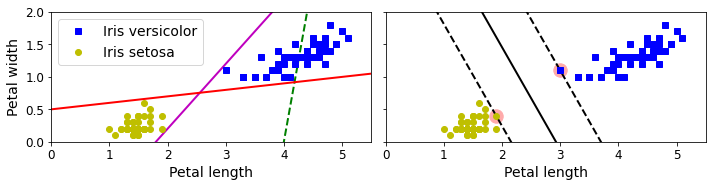

SVM Classifers try to find the widest possible street between classes without getting close to the data instances. <br>This is called <i>Large Margin Classification</i>

### Soft Margin Classification

If you impose that all instances must be off the street and on the correct side this is called <i>Hard Margin Classification</i><br>
Hard Margin Classification is poor for two reasons:<br>
1. Only will work on linearly separable data.
2. Is sensetive to outliers

Soft Margin Classification is when you try to keep the street as large as possible and limit margin violations. 

In Scikit-learn the SVM regularization hyperparameter C is used. If C is a low value then the street will become larger but have more margin violations, if C is a high value, then the street becomes smaller and you have less margin violations.

In [2]:
# Load Data
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2) # iris virginica

In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [4]:
svm_clf = make_pipeline(
    StandardScaler(),
    LinearSVC(C=1, random_state=42),
)
svm_clf.fit(X, y)

/home/dude/Desktop/env/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [5]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [6]:
svm_clf.decision_function(X_new)

array([ 0.66163411, -0.22036063])

## Non Linear SVM Classification

### Adding Features

The most simple way to do this is using Polynomial Features and use a Linear SVC

In [7]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, random_state=42)
)

polynomial_svm_clf.fit(X,y)

/home/dude/Desktop/env/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

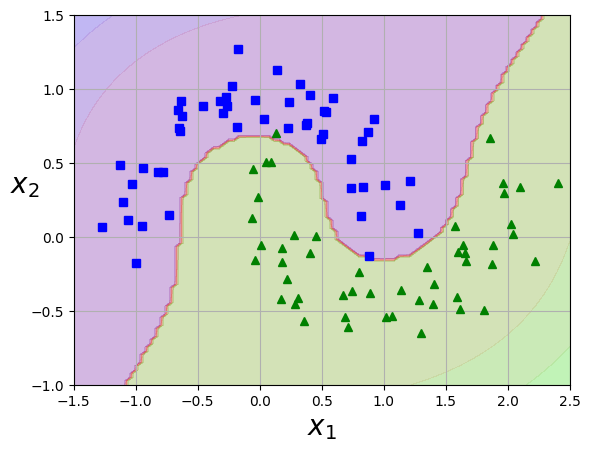

In [8]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

### Polynomial Kernel

Using a polynomial kernel or kernal trick can get the same results as PolyFeatures but without adding new features

In [9]:
from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(StandardScaler(),
                                   SVC(kernel='poly', degree=3, coef0=10, C=5))

poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=10, kernel='poly'))])

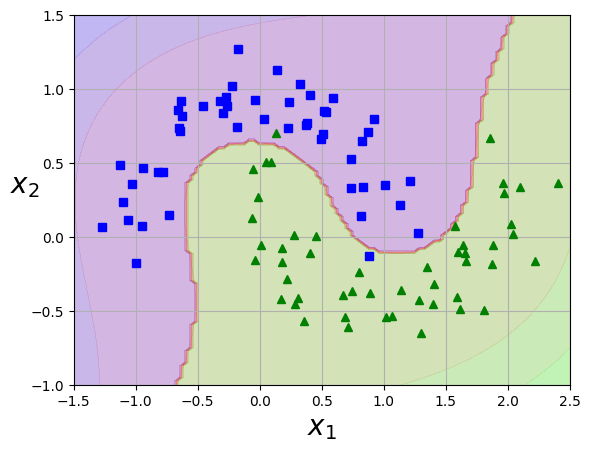

In [10]:
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

### Similarity Features

You can accomplish these types of problems by adding similarity features. To implment this you need to use RBF Kernel

### Gausiaan RBF Kernel

This Kernel Trick allows you to compute only the important extra features instead of computing all the possible features like with PolyFeatures

In [11]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
                                  SVC(kernel='rbf', gamma=5, C=0.001))
rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

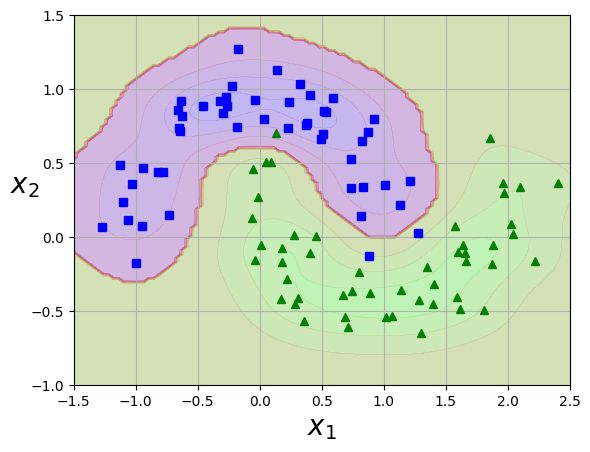

In [12]:
plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

## SVM Regression

The way SVM Regression works is instead of finding a street that seprates two classes without any margin violations, it tries to maximize the amount of margin violations

The width of the street is controlled by the hyperparameter Epsilon --> $ \epsilon $

In [98]:
from sklearn.datasets import make_regression
from sklearn.svm import LinearSVR, SVR

X, y = make_regression(n_samples=100, n_features=2, random_state=42)

svm_reg = make_pipeline(StandardScaler(),
                       LinearSVR(epsilon=0.5, random_state=42))

svm_reg.fit(X,y)

/home/dude/Desktop/env/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(epsilon=0.5, random_state=42))])

Can do none linear data by using PolyFeatures or kernel trick

## Exercises

### 10.

In [14]:
from sklearn.datasets import load_wine

In [15]:
X,y = load_wine(return_X_y=True)

In [23]:
y_class_0 = []
y_class_1 = []
y_class_2 = []

for cl in y:
    if cl == 0:
        y_class_0.append(1)
        y_class_1.append(0)
        y_class_2.append(0)
    elif cl == 1:
        y_class_0.append(0)
        y_class_1.append(1)
        y_class_2.append(0)
    else:
        y_class_0.append(0)
        y_class_1.append(0)
        y_class_2.append(1)

In [25]:
np.array(y_class_0)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [26]:
np.array(y_class_1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [27]:
np.array(y_class_2)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [36]:
X_train, X_test, y_train_0, y_test_0 = train_test_split(X, y_class_0, test_size=0.2, random_state=101)
X_train, X_test, y_train_1, y_test_1 = train_test_split(X, y_class_1, test_size=0.2, random_state=101)
X_train, X_test, y_train_2, y_test_2 = train_test_split(X, y_class_2, test_size=0.2, random_state=101)

In [49]:
class_0_pipeline = make_pipeline(StandardScaler(), LinearSVC(C=1))

class_0_pipeline.fit(X_train, y_train_0)
y_pred_0 = class_0_pipeline.predict(X_test)

print(classification_report(y_test_0, y_pred_0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        14

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



/home/dude/Desktop/env/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [51]:
class_1_pipeline = make_pipeline(StandardScaler(), LinearSVC(C=1))

class_1_pipeline.fit(X_train, y_train_1)
y_pred_1 = class_1_pipeline.predict(X_test)

print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        13

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



/home/dude/Desktop/env/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [57]:
class_2_pipeline = make_pipeline(StandardScaler(), SVC(kernel='poly', degree=3, C=1))

class_2_pipeline.fit(X_train, y_train_2)
y_pred_2 = class_2_pipeline.predict(X_test)

print(classification_report(y_test_2, y_pred_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### 11.

In [71]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

In [88]:
X,y = fetch_california_housing(return_X_y=True)

y = y * 100_000

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [95]:
# Start with linear SVR
housing_linear_pipeline = make_pipeline(StandardScaler(),
                                       LinearSVR(epsilon=1, random_state=101))
housing_linear_pipeline.fit(X_train, y_train)

y_pred = housing_linear_pipeline.predict(X_test)


/home/dude/Desktop/env/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [97]:
print("Linear RMSE: {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

Linear RMSE: 224490.88075381666


In [111]:
housing_pipeline = make_pipeline(StandardScaler(),
                                SVR(kernel='rbf', gamma=1, epsilon=5))
housing_pipeline.fit(X_train, y_train)

y_pred = housing_pipeline.predict(X_test)

In [112]:
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

RMSE: 119247.80792889639
